In [1]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import numpy as np

from datetime import datetime
from datetime import timedelta

import pandas as pd

In [2]:
from lib.dataeng import Etl

In [3]:
etl = Etl()

etl.repo

'/home/benjamin/Downloads/'

In [4]:
df_weight_raw, df_food_raw, df_exos_raw, df_all = etl.extract_store_all()


Le fichier poids le plus récent est : data_BEN_1707031718.zip, parmi :
data_BEN_1706593344.zip
data_BEN_1707031718.zip
data_BEN_1706676305.zip
data_BEN_1706944407.zip
data_BEN_1706861557.zip
data_BEN_1706761334.zip

Le fichier food le plus récent est : File-Export-2020-08-03-to-2024-02-04.zip, parmi
File-Export-2020-08-03-to-2024-02-01.zip
File-Export-2020-08-03-to-2024-02-03.zip
File-Export-2020-08-03-to-2024-01-31.zip
File-Export-2020-08-03-to-2024-02-02.zip
File-Export-2020-08-03-to-2024-01-30.zip
File-Export-2020-08-03-to-2024-02-04.zip

Le fichier exercices le plus récent est : polar-user-data-export_703c11e2-d0c0-42d0-84a6-665ce3a9f847.zip, parmi :
polar-user-data-export_12baa4ce-79a5-40f8-ad40-74308f7c2c26.zip
polar-user-data-export_703c11e2-d0c0-42d0-84a6-665ce3a9f847.zip


100%|██████████| 1868/1868 [01:00<00:00, 30.96it/s]


In [5]:
df_weight = df_weight_raw.groupby('Date').mean()

In [6]:
df_std = df_weight_raw.groupby('Date').std()

for colname in df_weight.columns:
    std_colname = 'std_' + colname
    df_weight[std_colname] = df_std[colname]

In [7]:
df_weight.dropna(inplace=True)

df_weight

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,std_Masse_Totale,std_Masse_Grasse,std_Masse_Osseuse,std_Masse_Musculaire,std_Masse_Hydrique,std_MG%,std_BMR
Date,,,,,,,,,,,,,,
2023-03-04,70.656667,11.420000,2.961667,56.258333,39.496667,0.161627,1649.512000,0.036148,0.058992,0.004082,0.056716,0.066533,0.000812,1.264415
2023-03-05,71.880000,11.848571,3.000000,57.014286,40.180000,0.164837,1666.678857,0.092376,0.106369,0.000000,0.037353,0.053229,0.001281,0.821828
2023-03-06,71.030000,10.924000,3.010000,57.082000,40.476000,0.153794,1668.289600,0.023452,0.030496,0.000000,0.031937,0.040988,0.000427,0.787734
2023-03-07,72.185000,11.126667,3.060000,57.986667,41.366667,0.154141,1688.860000,0.018708,0.050067,0.000000,0.052026,0.072019,0.000706,1.255156
2023-03-08,72.283333,10.178333,3.131667,58.956667,42.821667,0.140811,1711.468000,0.042269,0.052313,0.004082,0.038297,0.064317,0.000674,0.893206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,73.571538,12.973077,3.025385,57.560000,40.528462,0.176333,1678.926769,0.032621,0.062767,0.005189,0.071414,0.075260,0.000866,1.599096
2024-02-01,73.963333,12.926667,3.047500,57.971667,40.935000,0.174771,1688.392000,0.089069,0.071010,0.004523,0.075659,0.077753,0.000867,1.711558
2024-02-02,72.486000,12.187333,3.012667,57.270667,40.372667,0.168132,1672.451200,0.138141,0.089878,0.004577,0.069433,0.063636,0.000975,1.609923


In [8]:
PAST = 90 # on regarde les N derniers jours
PAST_REG = 30 # horizon de temps passé pour la régression
FUTUR = 30 # vers les M prochains jours
MOY = 7

df_weight2 = df_weight.rolling(window=MOY).mean()[-PAST:]

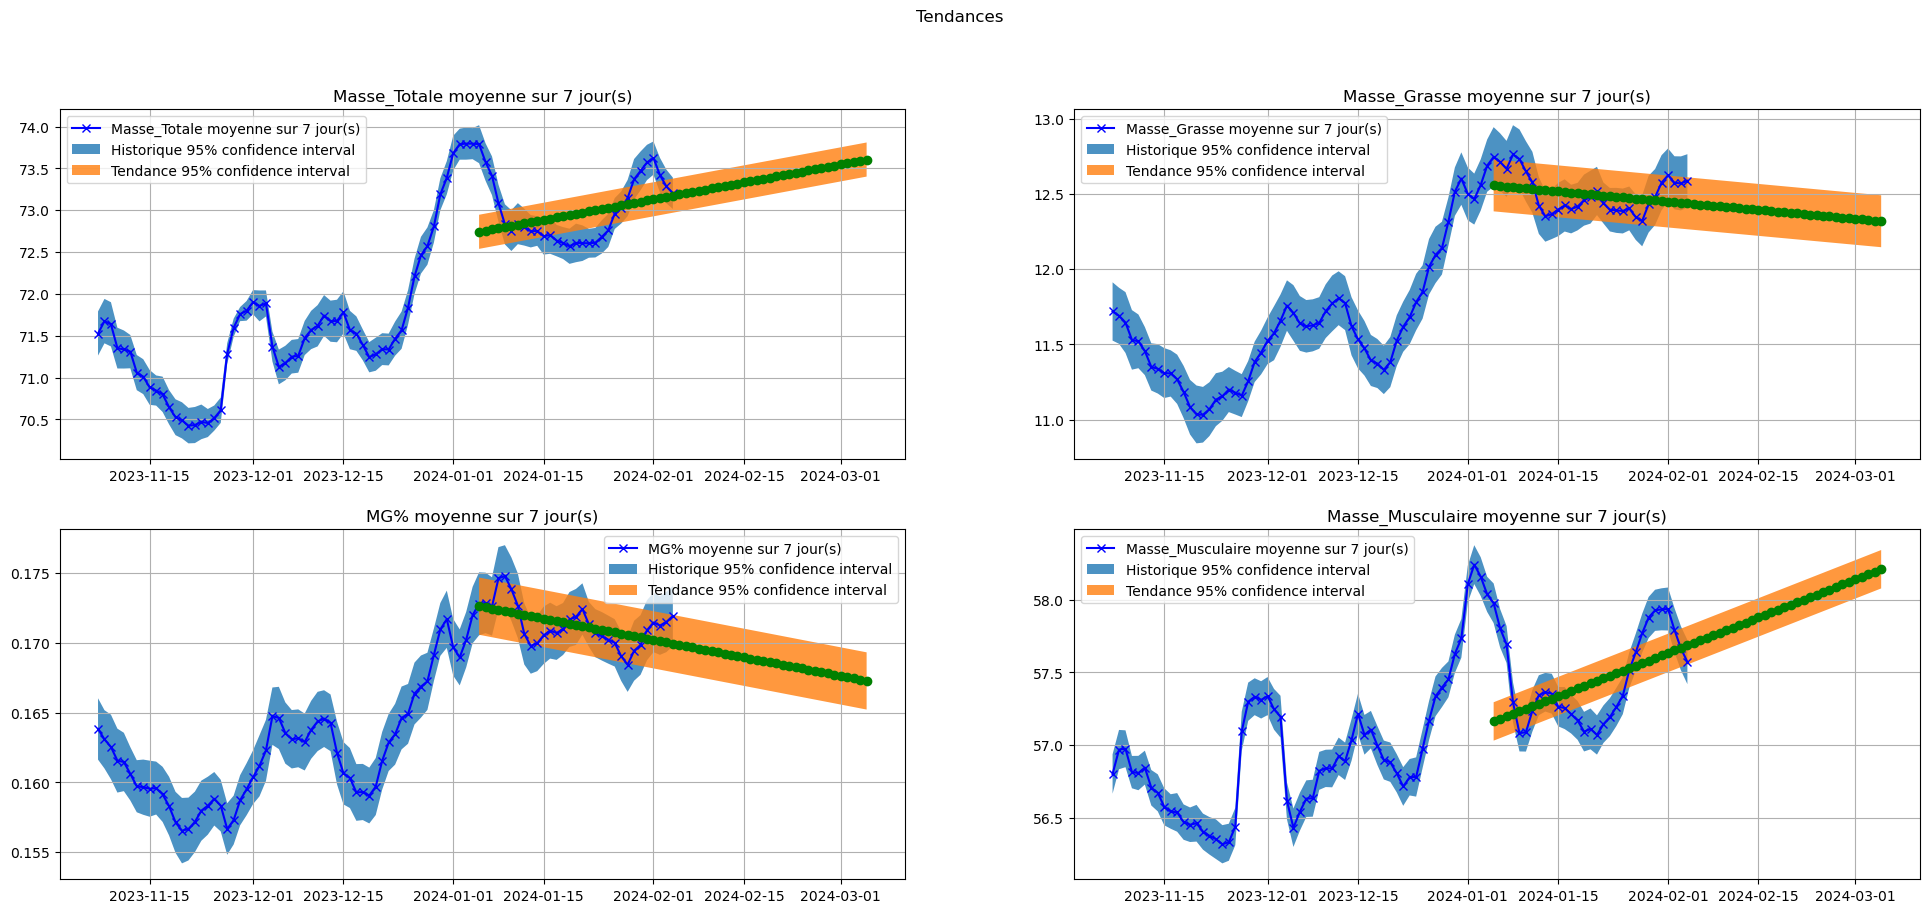

In [9]:
fig, ax = plt.subplots(figsize=(24,10), nrows=2, ncols=2)

list_to_display = ['Masse_Totale', 'Masse_Grasse', 'MG%', 'Masse_Musculaire']

for i, name in enumerate(list_to_display):
    r = i//2
    c = i%2
    name_std = 'std_' + name

    # historique avec standard deviation
    lbl = name + f' moyenne sur {MOY} jour(s)'
    ax[r,c].plot(df_weight2[name], marker = 'x', color='blue', label=lbl)
    ax[r,c].fill_between(
            df_weight2.index,
            df_weight2[name] - 1.96 * df_weight2[name_std],
            df_weight2[name] + 1.96 * df_weight2[name_std],
            alpha=0.8,
            label=r"Historique 95% confidence interval",
        )
    ax[r,c].grid(True)
    ax[r,c].set_title(lbl)

    # tendance
    full_std = df_weight2[name_std].mean()
    # projection LR
    lrr = LinearRegression()
    X_past = np.array( [ d.toordinal() for d in df_weight2.index[-PAST_REG:] ] ).reshape(-1,1)
    y = df_weight2[name][-PAST_REG:]
    lrr.fit(X_past, y)
    # calcul tendance
    X_trend = [ df_weight2.index[-1] + timedelta(days=i) for i in range(-PAST_REG, FUTUR+1 )]
    X_trend = np.array( [ d.toordinal() for d in X_trend ] ).reshape(-1,1)
    y_pred = lrr.predict(X_trend)

    X_trend_days = [ datetime.fromordinal(X_trend[i][0]) for i in range(len(X_trend)) ]
    df_pred = pd.DataFrame( data={"tendance" : y_pred}, index=X_trend_days )
    ax[r,c].plot(df_pred, marker='o', color='green')

    ax[r,c].fill_between(
            df_pred.index,
            df_pred['tendance'] - 1.96 * full_std,
            df_pred['tendance'] + 1.96 * full_std,
            alpha=0.8,
            label=r"Tendance 95% confidence interval",
    )

    ax[r,c].legend()
    
fig.suptitle(f'Tendances')

plt.show()